#PROYECTO PARCIAL: Clasificación de Fallas eléctricas

## Materia: Aprendizaje Automático

* Profesor: Caballero, Nicolas

* Alumno: Espindola, Matias


El proyecto se enmarca en el dominio de la **Ingeniería Eléctrica y el Mantenimiento Predictivo**, un área crítica para la eficiencia y seguridad de la infraestructura moderna y a partir de la siguiente pregunta interesante:

- ¿Es posible, a partir de las mediciones de voltaje, corriente y potencia, clasificar con alta precisión la causa raíz y especifica de una anomalía eléctrica, utilizando modelos de aprendizaje automático basados en la similitud de patrones?

El dataset proviene de una fuente de datos sintéticos y etiquetados, ampliamente utilizada en la investigación de ingeniería eléctrica para el desarrollo de modelos de detección y diagnóstico de fallas en sistemas de potencia, adquirido en la plataforma **Kaggle**.

## Configuración Inicial, Librerias y Carga de Datos

In [31]:
# Librerias

# Manipulación y análisis de datos
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento y modelado (scikit-learn)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

# Modelos de clasificación
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import time

# Métricas de evaluación
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score

# Configuración de visualización
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12})

print ('Librerias fundamentales cargadas exitosamente')

Librerias fundamentales cargadas exitosamente


In [32]:
# Carga del dataset
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks_2AÑO1CUATRI/Aprendizaje Automatico/Parcial/archivos_dataset/faultdata-new.csv',
                 skiprows=1, # para saltar la primera fila (la descripcion larga del encabezado)
                 sep=',', # asegura que el separador sea una coma
                 )
df.head()

,R,i25a,i25b,i25c,ira,irb,irc,isa,isb,isc,v25a,v25b,v25c,pg,qg,pr,qr,ps,qs,Target
0,0.01,5.1569,3.2233,2.2075,0.0032,0.003,0.0033,0.0035,0.0034,0.0028,842.5337,667.7393,334.0726,1040.0,1540.0,0.000048,0.00005,0.000135,0.000142,1
1,0.02,5.1569,3.2233,2.2075,0.0032,0.003,0.0033,0.0035,0.0034,0.0028,842.5337,667.7393,334.0726,1040.0,1540.0,0.000048,0.00005,0.000135,0.000142,1
2,0.04,5.1569,3.2233,2.2075,0.0032,0.003,0.0033,0.0035,0.0034,0.0028,842.5337,667.7393,334.0726,1040.0,1540.0,0.000048,0.00005,0.000135,0.000142,1
3,0.06,5.1569,3.2233,2.2075,0.0032,0.003,0.0033,0.0035,0.0034,0.0028,842.5337,667.7393,334.0726,1040.0,1540.0,0.000048,0.00005,0.000135,0.000142,1
4,0.08,5.1569,3.2233,2.2075,0.0032,0.003,0.0033,0.0035,0.0034,0.0028,842.5337,667.7393,334.0726,1040.0,1540.0,0.000048,0.00005,0.000135,0.000142,1


In [33]:
# Renombrar la columna 'Target'
df.rename(columns={'Target': 'CLASE_FALLA'}, inplace=True)

# Print de validación de carga y forma del dataframe
print(f'Columna "Target" renombrada a "CLASE_FALLA".')
print(f'\n DATASET CARGADO: Acceso y validación OK.')
display(df.head(2))
print(f'Instancias: {df.shape[0]}, Características: {df.shape[1]}')

Columna "Target" renombrada a "CLASE_FALLA".

 DATASET CARGADO: Acceso y validación OK.


,R,i25a,i25b,i25c,ira,irb,irc,isa,isb,isc,v25a,v25b,v25c,pg,qg,pr,qr,ps,qs,CLASE_FALLA
0,0.01,5.1569,3.2233,2.2075,0.0032,0.003,0.0033,0.0035,0.0034,0.0028,842.5337,667.7393,334.0726,1040.0,1540.0,0.000048,0.00005,0.000135,0.000142,1
1,0.02,5.1569,3.2233,2.2075,0.0032,0.003,0.0033,0.0035,0.0034,0.0028,842.5337,667.7393,334.0726,1040.0,1540.0,0.000048,0.00005,0.000135,0.000142,1


Instancias: 1788, Características: 20


## Análisis Exploratorio de Datos (EDA)

In [34]:
# Análisis estadistico
print('Análisis estadístico de las variables predictoras:')
display(df.describe().T)

Análisis estadístico de las variables predictoras:


,count,mean,std,min,25%,50%,75%,max
R,1788.0,342.924899,3.313180e+02,0.010000,8.500000,260.000000,630.000000,1000.000000
i25a,1788.0,5.710033,1.599097e+00,4.663600,5.156900,5.156900,5.156900,11.997700
i25b,1788.0,4.099235,2.065721e+00,2.888800,3.223300,3.223300,3.223300,11.336600
i25c,1788.0,2.994039,2.250871e+00,0.004600,2.207500,2.207500,2.207500,11.420400
ira,1788.0,0.003287,3.363585e-04,0.003100,0.003200,0.003200,0.003200,0.005400
irb,1788.0,0.003090,2.855546e-04,0.003000,0.003000,0.003000,0.003000,0.004600
irc,1788.0,0.003366,2.270282e-04,0.003200,0.003300,0.003300,0.003300,0.004700
isa,1788.0,0.003495,2.544926e-05,0.003400,0.003500,0.003500,0.003500,0.003700
isb,1788.0,0.003425,1.289127e-04,0.003300,0.003400,0.003400,0.003400,0.004400
isc,1788.0,0.002926,3.630004e-04,0.002800,0.002800,0.002800,0.002800,0.004300


Se detectan variables con STD = 0, lo que significa que todos los valores en esa columna son idénticos. Por lo cual opto por eliminar variables que tengan varianza cero para evitar problemas en las etapas posteriores de modelado.

In [35]:
# Separamos X para el cálculo de STD
X = df.drop('CLASE_FALLA', axis=1)
std_check = X.std()

# Buscamos variables con STD igual a 0 o valores extramadamente bajos
const_cols = std_check[std_check < 1e-10].index.tolist() # usamos un umbral para mayor robustez

if const_cols:
  print(f'Variables constantes encontradas (STD=0): {const_cols}')
else:
  print('No se encontraron variables constantes (STD=0).')

Variables constantes encontradas (STD=0): ['qs']


In [36]:
# Eliminación de la columna 'qs' al tener STD=0
df = df.drop(columns=const_cols)
print(f'Columna constante eliminada: {const_cols[0]}')

Columna constante eliminada: qs


In [37]:
# Definición de variables X e Y
X = df.drop('CLASE_FALLA', axis=1)
y = df['CLASE_FALLA']

print(f'Dataset final con {df.shape[1]} columnas ({X.shape[1]} predictoras)')

Dataset final con 19 columnas (18 predictoras)


In [38]:
# Inspección de tipos de datos y valores nulos
print('Tipo de datos y valores nulos:')
print(df.info())

# Comprobar si existe valores nulos y duplicados
print(f'\n Total de valores nulos: {df.isnull().sum().sum()}')
print(f'\nTotal de valores duplicados:{df.duplicated().sum()}')

Tipo de datos y valores nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1788 entries, 0 to 1787
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   R            1788 non-null   float64
 1   i25a         1788 non-null   float64
 2   i25b         1788 non-null   float64
 3   i25c         1788 non-null   float64
 4   ira          1788 non-null   float64
 5   irb          1788 non-null   float64
 6   irc          1788 non-null   float64
 7   isa          1788 non-null   float64
 8   isb          1788 non-null   float64
 9   isc          1788 non-null   float64
 10  v25a         1788 non-null   float64
 11  v25b         1788 non-null   float64
 12  v25c         1788 non-null   float64
 13  pg           1788 non-null   float64
 14  qg           1788 non-null   float64
 15  pr           1788 non-null   float64
 16  qr           1788 non-null   float64
 17  ps           1788 non-null   float64
 18  CLASE_FALLA  1788

In [39]:
# Análisis de la variable objetivo (CLASE_FALLA)
print('Análisis de la variable objetivo (CLASE_FALLA):')
conteo_clases = df['CLASE_FALLA'].value_counts()
porcentaje_clases = df['CLASE_FALLA'].value_counts(normalize=True) * 100
print('Conteo de registros por clase de falla:')
print(conteo_clases)
print('\nPorcentaje de registros por clase de falla:')
print(porcentaje_clases.round(2))

Análisis de la variable objetivo (CLASE_FALLA):
Conteo de registros por clase de falla:
CLASE_FALLA
1     149
2     149
3     149
4     149
5     149
6     149
7     149
8     149
9     149
10    149
11    149
12    149
Name: count, dtype: int64

Porcentaje de registros por clase de falla:
CLASE_FALLA
1     8.33
2     8.33
3     8.33
4     8.33
5     8.33
6     8.33
7     8.33
8     8.33
9     8.33
10    8.33
11    8.33
12    8.33
Name: proportion, dtype: float64


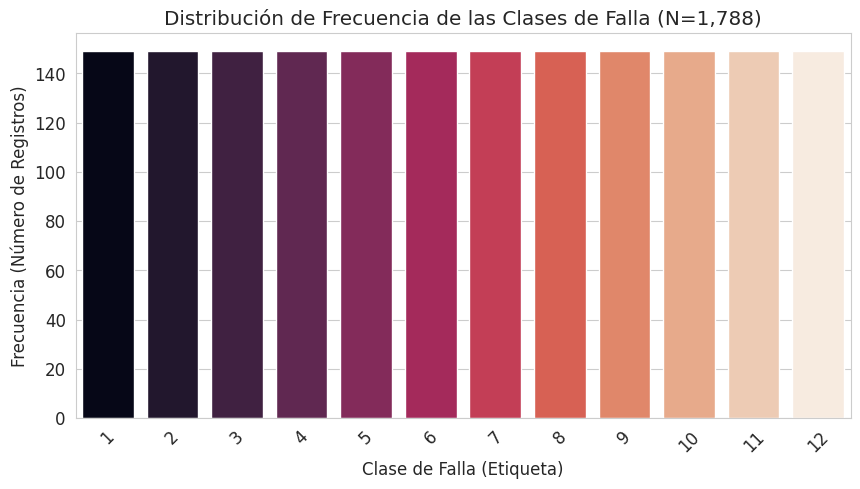


--- Conclusión sobre el Balance ---
Ratio Máxima/Mínima: 1.00
El dataset está balanceado.


In [40]:
# Visualización de la distribución de clases
plt.figure(figsize=(10, 5))
sns.barplot(
    x=conteo_clases.index,
    y=conteo_clases.values,
    hue=conteo_clases.index,
    palette='rocket',
    legend=False # desactiva la leyenda, que es redundante con el eje X
    )
plt.title('Distribución de Frecuencia de las Clases de Falla (N=1,788)')
plt.xlabel('Clase de Falla (Etiqueta)')
plt.ylabel('Frecuencia (Número de Registros)')
plt.xticks(rotation=45)
plt.show()

# Conclusión sobre el Balance
min_clase = conteo_clases.min()
max_clase = conteo_clases.max()
ratio = max_clase / min_clase

print('\n--- Conclusión sobre el Balance ---')
print(f'Ratio Máxima/Mínima: {ratio:.2f}')

if ratio > 2.5:
    print('ADVERTENCIA: Alto desbalance. Enfoque en F1-Score y Recall.')
else:
    print('El dataset está balanceado.')

### Detección de Outliers

In [41]:
# Generamos histogramas y boxplots para subconjunto de variables
# para reducir el impacto visual de tener 18 graficos en un mismo bloque
def plot_features(columns_to_plot, title_suffix):

    n_vars = len(columns_to_plot)
    # 2 gráficos (hist + box) por variable, en 3 filas (para 6 variables)
    n_rows = n_vars

    fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(12, 4 * n_rows))
    plt.suptitle(f'Distribución y Outliers: {title_suffix}', y=1.005, fontsize=16)
    fig.tight_layout(pad=3.0, h_pad=2.0)

    for i, col in enumerate(columns_to_plot):
        # Histograma (Distribución) - Columna 0
        sns.histplot(X[col], kde=True, ax=axes[i, 0], color='skyblue')
        axes[i, 0].set_title(f'Distribución de {col}', fontsize=12)
        axes[i, 0].axvline(X[col].median(), color='red', linestyle='--', linewidth=1)

        # Boxplot (Outliers y Escala) - Columna 1
        sns.boxplot(y=X[col], ax=axes[i, 1], color='lightcoral', orient='v')
        axes[i, 1].set_title(f'Outliers en {col}', fontsize=12)
        axes[i, 1].set_ylabel(f'Valor de {col}', fontsize=10) # Etiqueta al eje Y (la medición)
        axes[i, 1].set_xlabel('') # limpiamos el eje X

    plt.show()
    print("-" * 50)

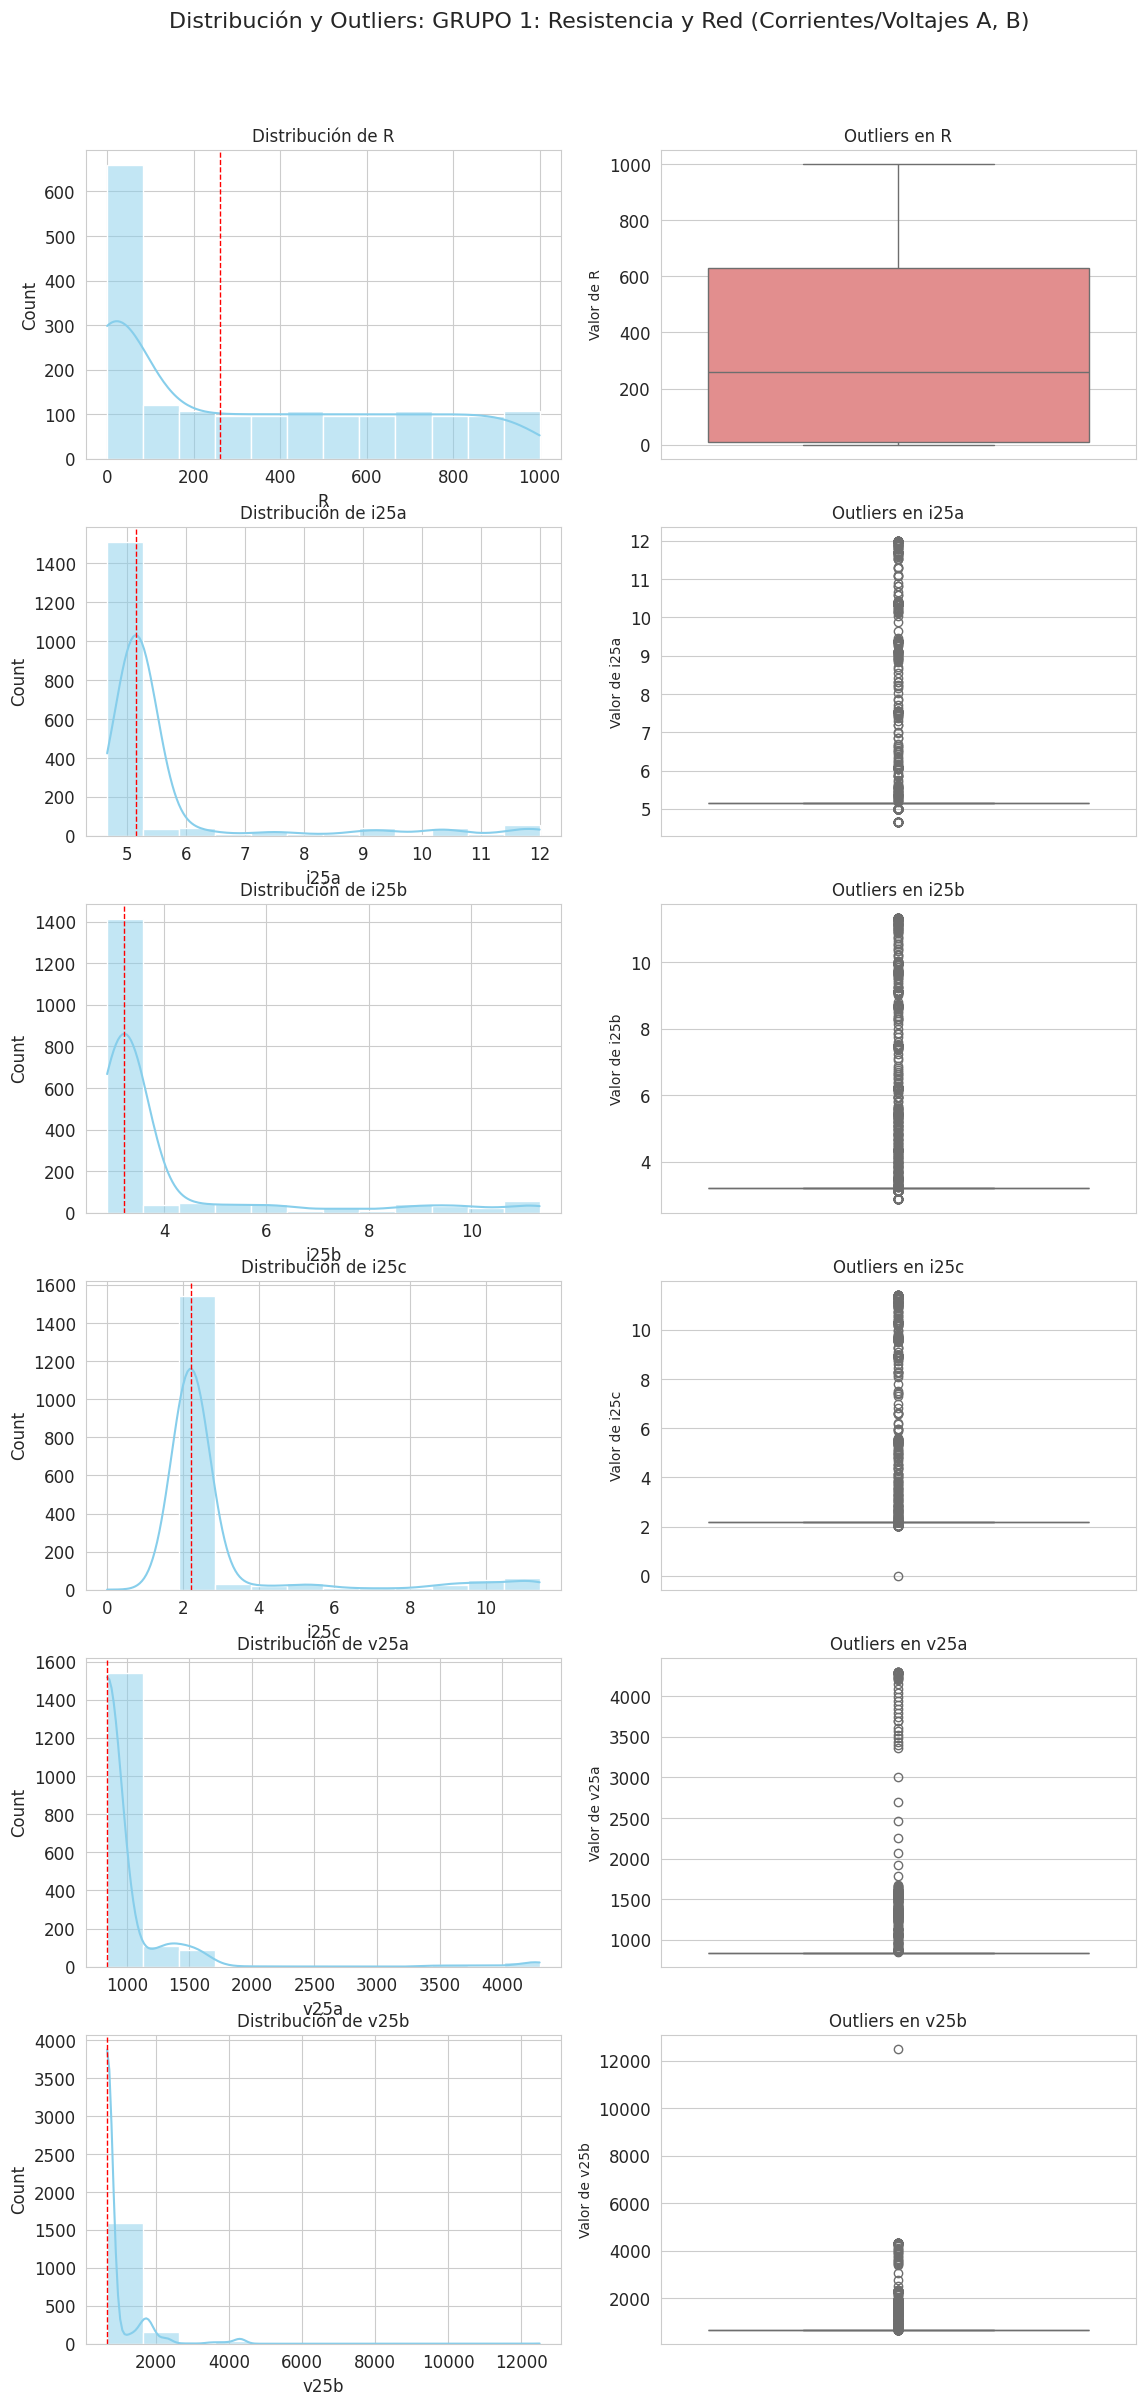

--------------------------------------------------


In [42]:
# Grupo 1 'Globales y Red' (i25,v25a,v25b)
cols_grupo1 = ['R', 'i25a', 'i25b', 'i25c', 'v25a', 'v25b']
plot_features(cols_grupo1, "GRUPO 1: Resistencia y Red (Corrientes/Voltajes A, B)")

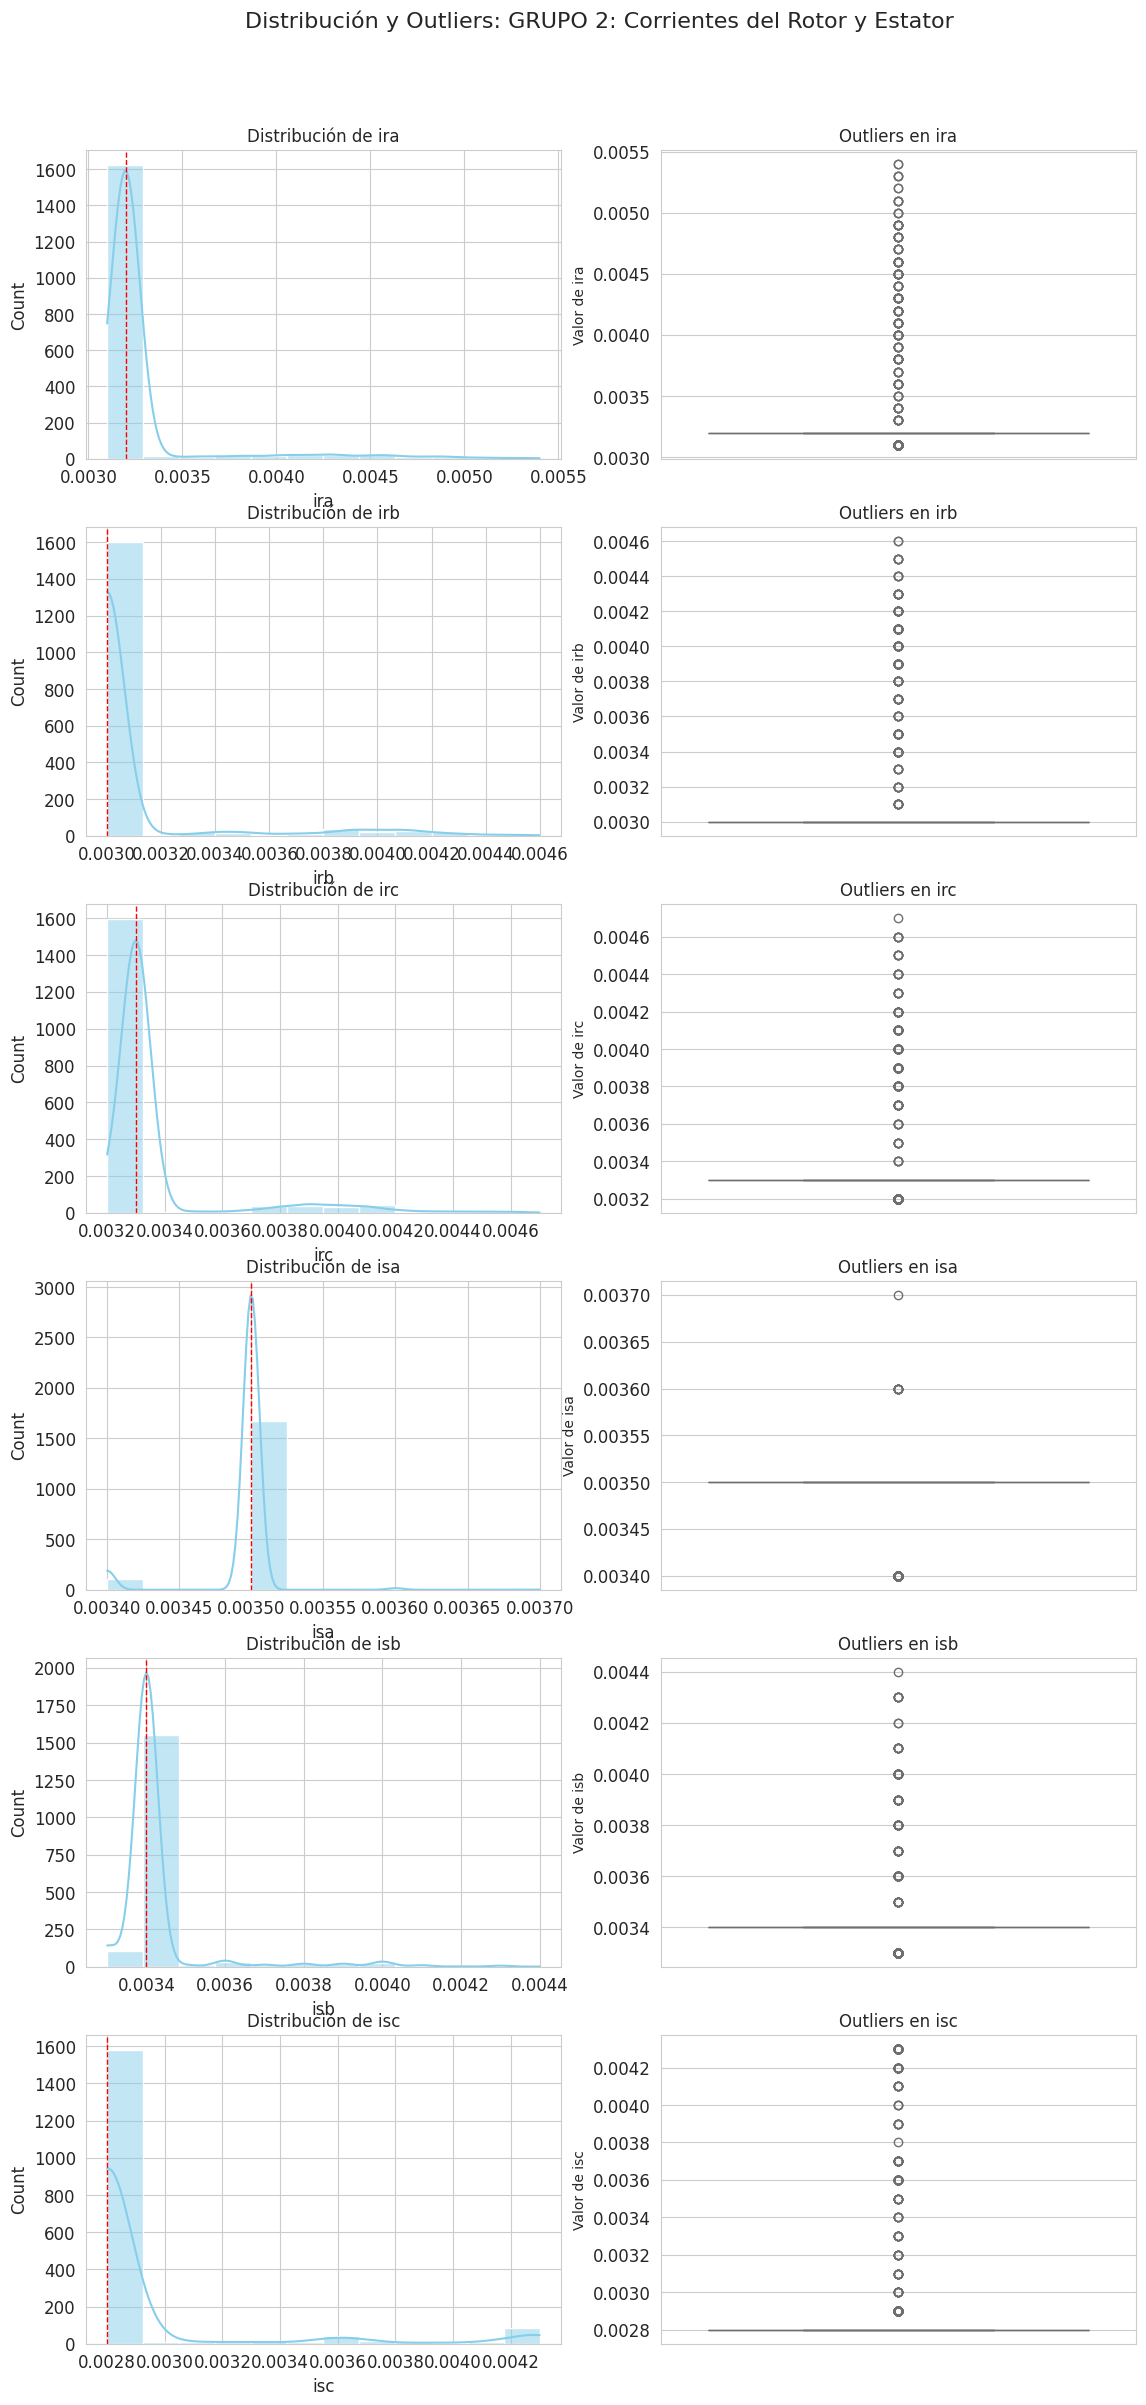

--------------------------------------------------


In [43]:
# Grupo 2 'Corrientes del Rotor y Estator'
cols_grupo2 = ['ira', 'irb', 'irc', 'isa', 'isb', 'isc']
plot_features(cols_grupo2, "GRUPO 2: Corrientes del Rotor y Estator")

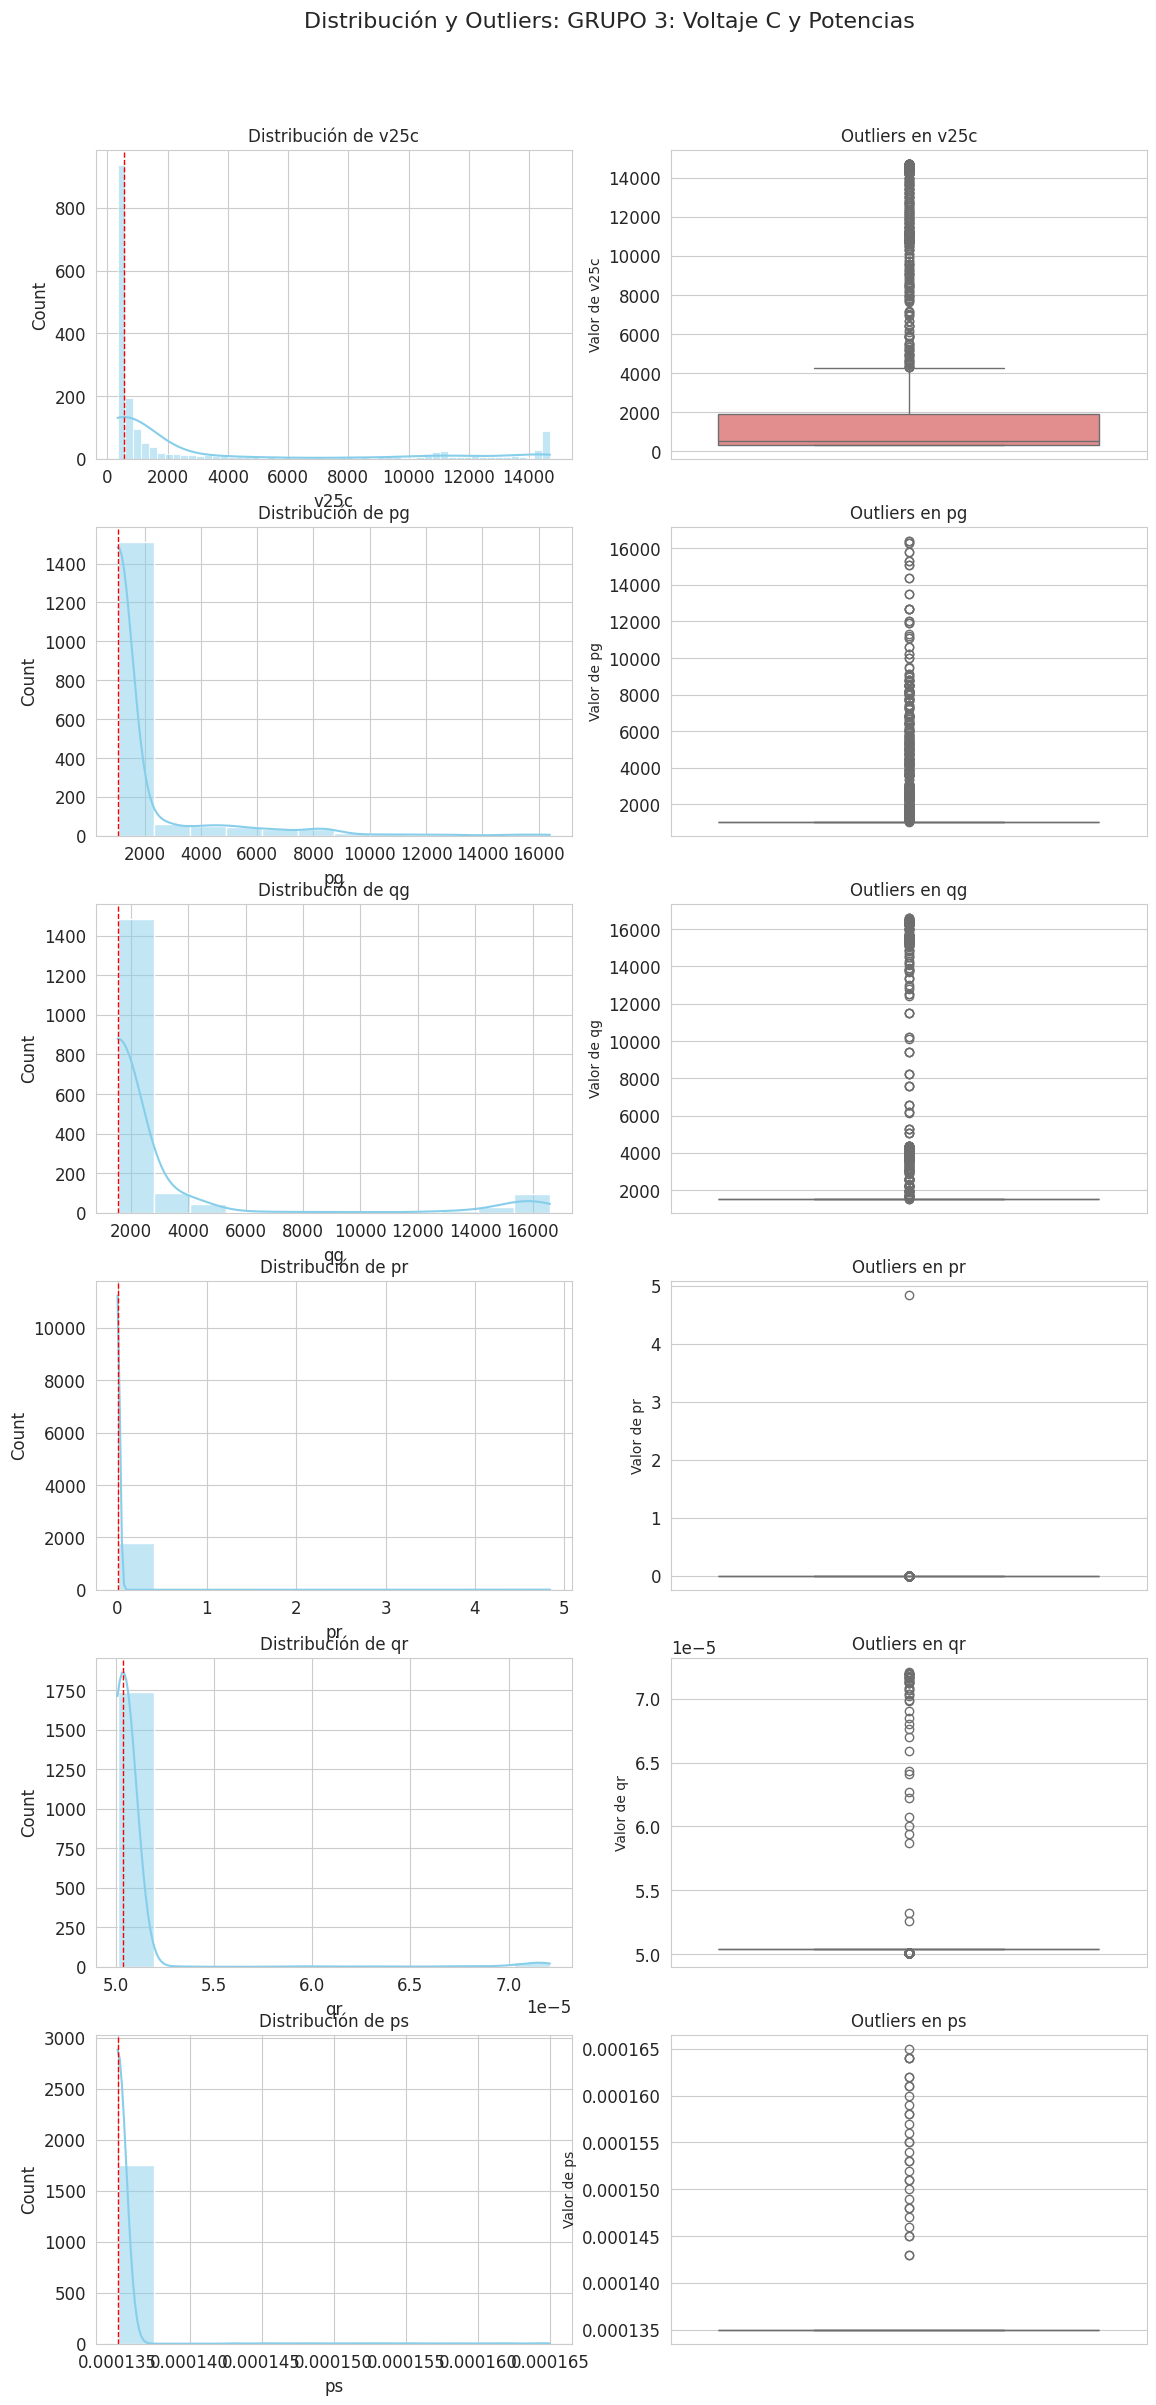

--------------------------------------------------


In [44]:
# Grupo 3 'Voltajes Restantes y Potencias'
cols_grupo3 = ['v25c', 'pg', 'qg', 'pr', 'qr', 'ps']
plot_features(cols_grupo3, "GRUPO 3: Voltaje C y Potencias")

In [45]:
# Análisis de correlación
correlacion = df.corr()

# Correlación con la variable objetivo (CLASE_FALLA)
correlacion_objetivo = correlacion['CLASE_FALLA'].sort_values(ascending=False)
print('\nCorrelación absoluta de variables predictoras con CLASE_FALLA:')
print(correlacion_objetivo.drop('CLASE_FALLA')) # excluimos la correlación consigo misma


Correlación absoluta de variables predictoras con CLASE_FALLA:
isa     2.836933e-01
v25a    2.440449e-01
v25b    2.177322e-01
v25c    1.314701e-01
qr      1.001754e-01
ps      7.370966e-02
i25c    1.894648e-02
R      -4.809030e-16
pg     -2.163494e-02
pr     -3.083698e-02
isc    -3.716668e-02
i25a   -4.733886e-02
isb    -5.279955e-02
irc    -6.181795e-02
i25b   -6.526674e-02
ira    -1.430248e-01
qg     -1.495465e-01
irb    -1.601564e-01
Name: CLASE_FALLA, dtype: float64


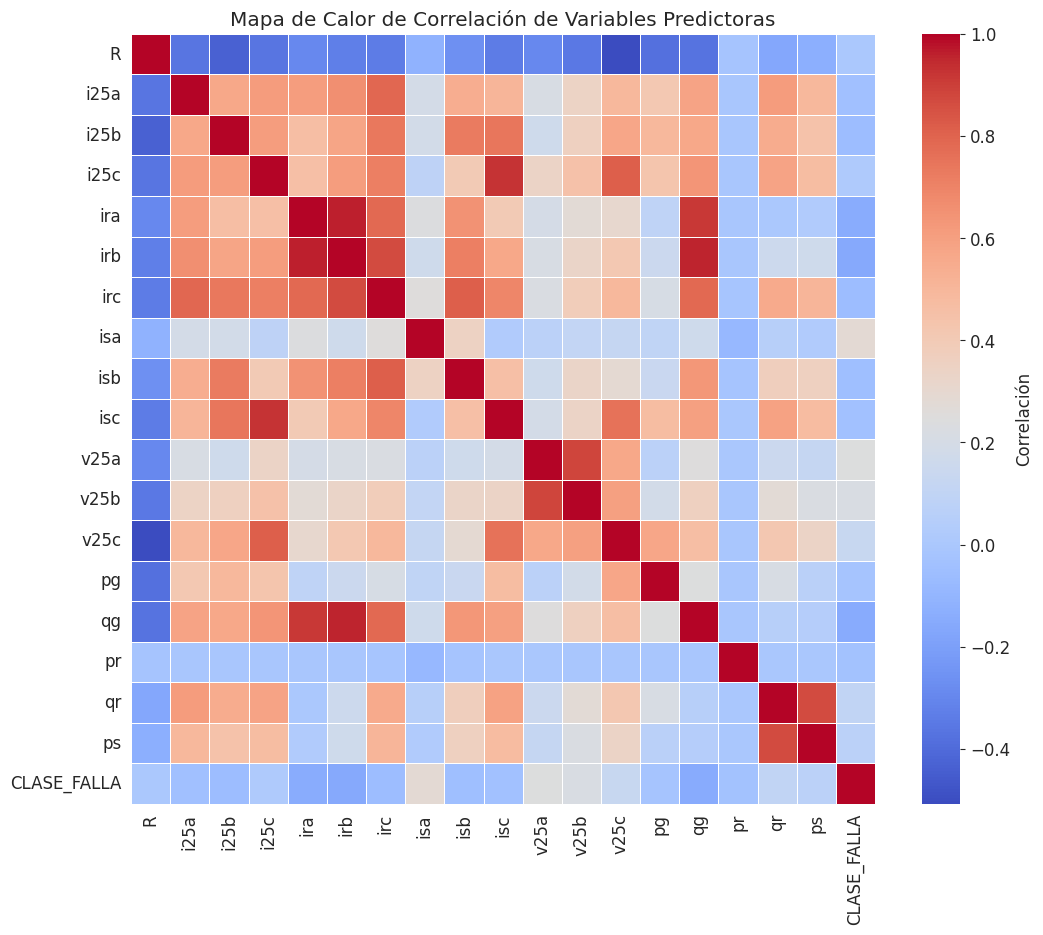

In [46]:
# Mapa de calor para análisis
plt.figure(figsize=(12,10))
sns.heatmap(
    correlacion,
    annot=False, # ocultamos números para mejor legibilidad
    cmap='coolwarm',
    fmt='.2f',
    linewidths=.5,
    cbar_kws={'label': 'Correlación'}
    )
plt.title('Mapa de Calor de Correlación de Variables Predictoras')
plt.show()

## Informe de Cierre de la Exploración de Datos
El objetivo de esta fase fue comprender la estructura, calidad y distribución de los datos, así como identificar anomalías que impacten el modelo k-NN.

A. **Calidad y Consistencia del Dataset**

1.	*Instancias y Variables:* El dataset final de trabajo consta de 1,788 instancias y 19 columnas (18 predictoras y 1 objetivo).

2.	*Valores Constantes (Varianza Cero):* La variable ‘qs’ (Potencia Reactiva del Estator) fue identificada con una desviación estándar próxima a cero (constante) y fue eliminada, ya que no aporta capacidad predictiva.

3.	*Valores Nulos:* Se confirmó que el dataset no contiene valores nulos (NaN), eliminando la necesidad de imputación.

B. **Análisis de la Variable Objetivo ($Y$)**

1.	*Balance de Clases:* La variable objetivo (CLASE_FALLA) está perfectamente balanceada. Cada una de las 12 clases de falla tiene exactamente el mismo número de instancias. Esto es ideal, ya que evita el sesgo del modelo y garantiza que métricas simples como el Accuracy sean adecuadas para la evaluación.

C. **Análisis de las Variables Predictoras ($X$)**

1.	*Escala:* Los gráficos de dispersión (Boxplots) mostraron una diferencia extrema en las escalas de las variables.

o	Variables como R, v25x, pg, y qg operan en un rango de cientos o miles.

o	Variables como las corrientes (ixx) y potencias del rotor (pr, qr, ps) operan en un rango de milésimas o centésimas de unidad, haciendo que sus Boxplots sean casi planos (indicando una varianza minúscula).

o	Implicación para k-NN: La falta de estandarización haría que las variables con mayor magnitud (ej., R) dominaran la función de distancia, haciendo inútil el cálculo de la similitud.


2.	*Outliers:* Se detectó la presencia de numerosos outliers en la mayoría de las variables. Esto es esperado en datos de fallas eléctricas, donde las anomalías causan picos y lecturas extremas. Estos outliers no deben eliminarse sin un análisis exhaustivo, ya que podrían contener información crítica sobre las fallas.


3.	*Correlación y Multicolinealidad:* El análisis visual y la naturaleza de los datos confirman la alta multicolinealidad entre las variables de la misma fase (ej., las tres corrientes de red, i25a, i25b, i25c están fuertemente correlacionadas). Esta multicolinealidad es inherente al sistema eléctrico, pero no afecta negativamente al modelo k-NN (a diferencia de modelos basados en coeficientes, como la Regresión Logística).


D. **Conclusión y Justificación del Preprocesamiento**

La principal conclusión del EDA es la necesidad urgente de tratar la escala de los datos.

*Estrategia de Preprocesamiento:* Es obligatorio aplicar el Estandarizador (StandardScaler) para centrar los datos en la media (0) y escalar su varianza (1).
Esto garantiza que el algoritmo k-NN calcule distancias justas y que todas las variables predictoras contribuyan de manera equitativa a la clasificación de las fallas.

## Preprocesamiento de datos

### Escalado de variables predictoras

In [47]:
# Aplicar StandardScaler (critico para k-NN)
scaler = StandardScaler()

# Ajustar y transformar los datos de las variables predictoras X
X_scaled_array = scaler.fit_transform(X)

# Convertir a dataframe
X_scaled = pd.DataFrame(X_scaled_array, columns=X.columns)

# Prints de verificacion y resumen estadistico
print('Variables predictoras (X) escaladas.')
print('Resumen estadistico de media y desviación estandar de la variable predictora (X) escalada:')
estadisticas_escaladas = X_scaled.describe().T[['mean', 'std']]
display(estadisticas_escaladas)

Variables predictoras (X) escaladas.
Resumen estadistico de media y desviación estandar de la variable predictora (X) escalada:


,mean,std
R,7.947905e-18,1.00028
i25a,-4.132911e-16,1.00028
i25b,-1.589581e-16,1.00028
i25c,-1.986976e-17,1.00028
ira,-1.716748e-15,1.00028
irb,-1.939289e-15,1.00028
irc,3.544766e-15,1.00028
isa,-3.943751e-14,1.00028
isb,-5.563534e-17,1.00028
isc,3.497078e-16,1.00028


### Creacion del dataset listo para modelado

In [48]:
# Combinación de las predictoras escaladas con la variable objetivo (y)
df_escalado = X_scaled.copy()

# Asignamos la variable objetivo, utilizando .values para mantener el indice
df_escalado['CLASE_FALLA'] = y.values

#Exportamos el dataframe a un nuevo archivo CSV
df_escalado.to_csv('/content/drive/MyDrive/Colab_Notebooks_2AÑO1CUATRI/Aprendizaje Automatico/Parcial/archivos_dataset/faultdata-escalado.csv', index=False)
nombre_archivo_final = '/content/drive/MyDrive/Colab_Notebooks_2AÑO1CUATRI/Aprendizaje Automatico/Parcial/archivos_dataset/faultdata-escalado.csv'

print(f"PREPROCESAMIENTO COMPLETO Dataset final (limpio y escalado) exportado a: {nombre_archivo_final}")

PREPROCESAMIENTO COMPLETO Dataset final (limpio y escalado) exportado a: /content/drive/MyDrive/Colab_Notebooks_2AÑO1CUATRI/Aprendizaje Automatico/Parcial/archivos_dataset/faultdata-escalado.csv


### Carga del nuevo dataset

In [49]:
# Carga del dataset escalado
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks_2AÑO1CUATRI/Aprendizaje Automatico/Parcial/archivos_dataset/faultdata-escalado.csv',
                 sep=',')
df.head()

,R,i25a,i25b,i25c,ira,irb,irc,isa,isb,isc,v25a,v25b,v25c,pg,qg,pr,qr,ps,CLASE_FALLA
0,-1.035292,-0.346,-0.424152,-0.349536,-0.257967,-0.316597,-0.289789,0.213231,-0.190946,-0.346298,-0.288895,-0.342542,-0.549078,-0.373422,-0.358251,-0.023656,-0.15381,-0.127586,1
1,-1.035262,-0.346,-0.424152,-0.349536,-0.257967,-0.316597,-0.289789,0.213231,-0.190946,-0.346298,-0.288895,-0.342542,-0.549078,-0.373422,-0.358251,-0.023656,-0.15381,-0.127586,1
2,-1.035201,-0.346,-0.424152,-0.349536,-0.257967,-0.316597,-0.289789,0.213231,-0.190946,-0.346298,-0.288895,-0.342542,-0.549078,-0.373422,-0.358251,-0.023656,-0.15381,-0.127586,1
3,-1.035141,-0.346,-0.424152,-0.349536,-0.257967,-0.316597,-0.289789,0.213231,-0.190946,-0.346298,-0.288895,-0.342542,-0.549078,-0.373422,-0.358251,-0.023656,-0.15381,-0.127586,1
4,-1.035081,-0.346,-0.424152,-0.349536,-0.257967,-0.316597,-0.289789,0.213231,-0.190946,-0.346298,-0.288895,-0.342542,-0.549078,-0.373422,-0.358251,-0.023656,-0.15381,-0.127586,1


### División en  X/Y

In [50]:
# Separa las variables predictoras de la variable objetivo
X = df.drop('CLASE_FALLA', axis=1)
y = df['CLASE_FALLA']

In [51]:
#División de los datos Train (80) Test(20)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2, # tamaño de la prueba
    random_state=42,
    stratify=y # para mantener la proporcion de clases en los conjuntos de entrenamiento y prueba
    )

# Print de confirmación
print('División en conjuntos de entrenamiento (train) y prueba (test) realizada.')
print(f'Tamaño de Entrenamiento (train): {X_train.shape}')
print(f'Tamaño de Prueba (test): {X_test.shape}')

División en conjuntos de entrenamiento (train) y prueba (test) realizada.
Tamaño de Entrenamiento (train): (1430, 18)
Tamaño de Prueba (test): (358, 18)


# PCA
La aplicación de PCA (Principal Component Analysis) se decide en esta fase por dos razones fundamentales identificadas durante la Exploración de Datos (EDA):

1. Mitigación de la Multicolinealidad

El análisis de correlación confirmó la alta multicolinealidad entre las mediciones de las distintas fases (ej., i25a, i25b, i25c). PCA transforma estas variables correlacionadas en un nuevo conjunto de Componentes Principales no correlacionados. Esto estabiliza el análisis y permite un modelado más robusto.

2. Reducción de Ruido y Dimensionalidad

 Al establecer (n_components=0.95), el objetivo es reducir el número de variables a la cantidad mínima necesaria para retener el 95% de la varianza total de los datos. Esta simplificación del espacio de caracteristicas ayuda a filtrar el ruido de las mediciones y optimiza el rendimiento y eficiencia de los clasificadores finales, mejorando la capacidad de generalización del modelo.

In [52]:
# Aplicación de PCA
pca = PCA(n_components=0.95).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"PCA aplicado. Componentes necesarios para el 95% de la varianza: {pca.n_components_}")
print(f"Forma de X_train original: {X_train.shape}")
print(f"Forma de X_train transformado (PCA): {X_train_pca.shape}")

PCA aplicado. Componentes necesarios para el 95% de la varianza: 9
Forma de X_train original: (1430, 18)
Forma de X_train transformado (PCA): (1430, 9)


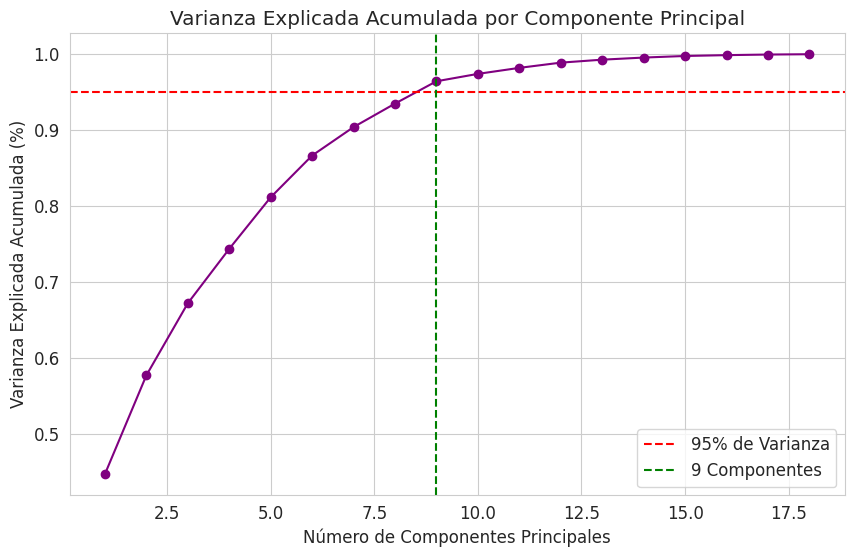


Se requieren 9 Componentes Principales para explicar el 95% de la varianza total.


In [53]:
# Visualizaciónes del PCA

# Ejecutar PCA sin restricción (n_components=None) para obtener todas las PCs
pca_full = PCA(n_components=None).fit(X_train)

# Obtener la varianza explicada por cada componente
varianza_explicada = pca_full.explained_variance_ratio_

# Calcular la varianza explicada acumulada
varianza_acumulada = np.cumsum(varianza_explicada)

# Identificar el número de componentes para el 95%
n_components_95 = np.where(varianza_acumulada >= 0.95)[0][0] + 1

# Graficar la Varianza Acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o', linestyle='-', color='purple')
plt.title('Varianza Explicada Acumulada por Componente Principal')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada (%)')
plt.grid(True)

# Marcar el umbral del 95%
plt.axhline(y=0.95, color='r', linestyle='--', label='95% de Varianza')
plt.axvline(x=n_components_95, color='g', linestyle='--', label=f'{n_components_95} Componentes')
plt.legend()
plt.show()

print(f"\nSe requieren {n_components_95} Componentes Principales para explicar el 95% de la varianza total.")

### Conclusión del Análisis de Varianza Explicada

El gráfico de Varianza Explicada Acumulada demuestra que se puede lograr una reducción de dimensionalidad significativa manteniendo la mayor parte de la información.

* Variables originales: 18
* Varianza Retenida: 95%
* Componentes Principales (PCs) Necesarios: **9**

Esto significa que el problema de clasificación se simplificará al usar solo 9 variables transformadas en lugar de las 18 originales. Este proceso no solo mejora la eficiencia computacional, sino que también es crucial para mitigar la multicolinealidad entre las varabiles de entrada, lo que resulta en un modelo de **Regresión Logística** más estable y con mejor capacidad de generalización.

# Despliegue Regresión Logística

In [54]:
# Rango de valores de C a probar
C_values = [0.01, 0.1, 1, 10, 100]
mejor_C = 0
mejor_accuracy_c = 0
mejor_reporte_reglog = ""

print("--- Exploración del Hiperparámetro C en Regresión Logística ---\n")

for C in C_values:
    # Crear el modelo de Regresión Logística
    reg_log = LogisticRegression(
        solver='saga',
        penalty='l2', # Usamos L2, que fue el mejor encontrado
        C=C, # Iteramos sobre el valor de C
        max_iter=5000,
        random_state=42
    )

    # Entrenar el modelo con los datos PCA de entrenamiento
    reg_log.fit(X_train_pca, y_train)

    # Predecir en el conjunto de prueba (X_test_pca)
    y_pred = reg_log.predict(X_test_pca)

    # Calcular el Accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Imprimir el resultado
    print(f"C = {C:<6} | Accuracy: {accuracy:.4f}")

    # Registrar el mejor C encontrado
    if accuracy > mejor_accuracy_c:
        mejor_accuracy_c = accuracy
        mejor_C = C
        # Reporte de clasificación
        reporte_reglog = classification_report(y_test, y_pred, zero_division=0)

print("\n-------------------------------------------------------------")
print(f" Mejor C encontrado en esta exploración: C = {mejor_C:<6} (Accuracy: {mejor_accuracy_c:.4f})")
print("\n--- Reporte de Clasificación del Modelo Óptimo ---")
print(reporte_reglog)

accuracy_reglog = mejor_accuracy_c

--- Exploración del Hiperparámetro C en Regresión Logística ---

C = 0.01   | Accuracy: 0.3128
C = 0.1    | Accuracy: 0.3911
C = 1      | Accuracy: 0.4162
C = 10     | Accuracy: 0.4721
C = 100    | Accuracy: 0.4888

-------------------------------------------------------------
 Mejor C encontrado en esta exploración: C = 100    (Accuracy: 0.4888)

--- Reporte de Clasificación del Modelo Óptimo ---
              precision    recall  f1-score   support

           1       0.29      0.73      0.42        30
           2       1.00      1.00      1.00        30
           3       0.34      0.67      0.45        30
           4       0.87      0.43      0.58        30
           5       0.73      0.27      0.39        30
           6       0.67      0.40      0.50        30
           7       0.47      0.77      0.58        30
           8       0.60      0.20      0.30        30
           9       0.33      0.07      0.11        30
          10       0.21      0.21      0.21        29
    

## Matriz de Confusión

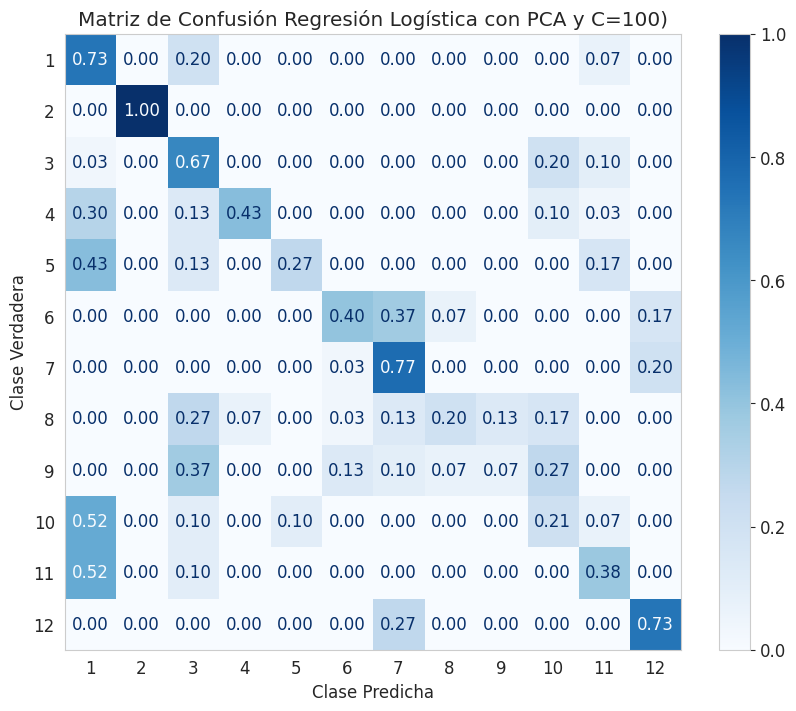


--- INTERPRETACIÓN VISUAL ---
Cada fila representa la CLASE VERDADERA. La diagonal principal (de arriba izquierda a abajo derecha) es el porcentaje de acierto ('Recall') por clase.
Un valor de 1.00 fuera de la diagonal (ej: Fila X, Columna Y) significa que TODAS las muestras de la Clase X fueron erróneamente clasificadas como Clase Y.


In [55]:
# Las etiquetas de las clases son de 1 a 12
n_clases = np.unique(y_test)
conf_matrix = confusion_matrix(y_test, y_pred, labels=n_clases)

# Normalización de la matriz para ver proporciones
# cm.sum(axis=1) suma todos los elementos por fila (clase verdadera)
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots(figsize=(10, 8))

# Usamos el objeto ConfusionMatrixDisplay para el gráfico
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_norm, display_labels=n_clases)

# Usamos valores normalizados y un mapa de colores (cmap) que resalta los aciertos
disp.plot(cmap=plt.cm.Blues, ax=ax, values_format=".2f")
ax.set_title("Matriz de Confusión Regresión Logística con PCA y C=100)")
ax.set_xlabel("Clase Predicha")
ax.set_ylabel("Clase Verdadera")
plt.grid(False) # Quitar la grilla para que la matriz sea más clara
plt.show()

print("\n--- INTERPRETACIÓN VISUAL ---")
print("Cada fila representa la CLASE VERDADERA. La diagonal principal (de arriba izquierda a abajo derecha) es el porcentaje de acierto ('Recall') por clase.")
print("Un valor de 1.00 fuera de la diagonal (ej: Fila X, Columna Y) significa que TODAS las muestras de la Clase X fueron erróneamente clasificadas como Clase Y.")

Al analizar nuevamente las métricas obtenidas por el modelo de Regresión Logística Multinomial podemos interpretar lo siguiente:

* El Accuracy global es de 0.4888. El modelo es capaz de predecir correctamente la clase de falla el 48.88% de las veces en datos no vistos. Aunque no es un valor significativamente alto, es el mejor rendimiento que se pudo obtener con los modelos lineales y basados en distancia (k-NN) probados.

* Clase 2: Alcanzo un rendimiento perfecto (100%), esta clase es fácil de distinguir por el modelo, alcanzando 1.00 en precision, recall y f1-score. Esto puede sugerir que las características seleccionadas por el PCA tienen una presencia clara para este tipo de falla.

* Clase con F1-Score alto: Las clases 4, 6, 7 y 12 muestran también un rendimiento aceptable (F1-Score mayor a 0.50).

* Clases débiles con bajo Recall: Las clases 5, 8 y 9 tienen un Recall extremadamente bajo (C5 = 0.27, C8 = 0.20 y C9 = 0.07). Esto puede interpretarse que, si ocurre una falla de Clase 9, el modelo solo la detecta correctamente el 7% de las veces, y el 93% de las veces confunde la falla de Clase 9 con otras clases. Esto es un problema crítico, ya que la falla no se estaría diagnosticando.

* La Macro Average de Precision (0.55) es más alta que la de Recall (0.49), indicando que cuando el modelo decide clasificar una falla, tiene una probabilidad decente de acierto, pero le cuesta identificar todas las ocurrencias de las clases minoritarias o complejas (ej. bajo recall).

# **Conclusiones Finales**

El objetivo principal de este proyecto fue desarrollar un modelo de Aprendizaje Automático capaz de clasificar 12 categorías de fallas eléctricas. Luego de comparar los modelos de k-NN y Regresión Logística Multinomial se definió a este último como el modelo de mejor desempeño en base a los resultados obtenidos por sus métricas.

El máximo rendimiento alcanzado por la Regresión Logística fue un Accuracy del 48.88% en el conjunto de prueba, obtenido con una configuración de hiperparámetros óptima (C=100) y la aplicación de Análisis de Componentes Principales (PCA).

* Consideración del Balance de Clases

Desde la etapa de Análisis Exploratorio de Datos (EDA), se constató que las 12 clases objetivo estaban razonablemente balanceadas (aproximadamente 30 muestras por clase en el conjunto de prueba). Por lo tanto, el Accuracy se consideró una métrica válida para la selección inicial del modelo, aunque posteriormente se complementó con Precision, Recall y F1-Score para evaluar el rendimiento por clase.

* Análisis Técnico de las Estrategias Implementadas

Estrategia de Preprocesamiento (PCA):

La aplicación de PCA, manteniendo el 95% de la varianza original, fue la técnica crucial. Demostró ser indispensable para mitigar la alta correlación y multicolinealidad inherente en los datos de mediciones eléctricas (corrientes y tensiones) reduciendo la cantidad de variables, o componentes principales para el entrenamiento en 9 variables.

El rendimiento de la Regresión Logística mejoró notablemente sobre el conjunto de datos transformado, lo que confirma que el modelo se benefició de un espacio de características de menor dimensionalidad.

* Optimización de Hiperparámetros:

Se implementó una estrategia de búsqueda con un bucle 'for' para encontrar el valor óptimo de 'C' en la Regresión Logística.

El valor óptimo (C=100) indica que el modelo requiere una regularización muy débil (penalty='l2'), sugiriendo que las características ya limpiadas por PCA no están causando un sobreajuste significativo (overfitting).

* Análisis de Desempeño por Clase (Matriz de Confusión):

El bajo valor de Accuracy (48.88%) puede explicarse por el desempeño heterogéneo del modelo.

Se observó una capacidad de clasificación perfecta para la Clase 2 (Recall y Precision de 1.00).

El principal punto de falla radica en la reducida capacidad del modelo para detectar las fallas de Clases 5, 8 y 9, particularmente la Clase 9 con un Recall de solo 0.07. Esto significa que el 93% de las ocurrencias de esta falla son clasificadas erróneamente como otras clases (principalmente la Clase 1, como se observa en la Matriz de Confusión), lo que representa un riesgo de falla en su clasificación de diagnóstico crítico.

* Propuestas de Mejora del Modelo

Para alcanzar mejores métricas en un sistema de diagnóstico real, se pueden implementar las siguientes mejoras, centradas en la introducción de no-linealidad:

1. Transición a Modelos No Lineales: Explorar algoritmos con mayor capacidad para capturar fronteras de decisión más complejas que separan las fallas más problemáticas (Clases 5, 8, 9).

2. Modelos de Conjunto (Ensemble): Implementar Random Forest o Gradient Boosting Machines (GBM), que efectivos y robustos afrontando problemas de alta dimensionalidad.

3. Redes Neuronales: Utilizar Redes Neuronales Multicapa (MLP) con una o dos capas ocultas, ya que esta arquitectura puede aprender patrones no lineales de manera efectiva sobre las componentes principales de PCA.

4. Estrategias de Muestreo (Sampling Focalizado): Dada la extrema dificultad para identificar las Clases 9, 8 y 5, se podría implementar un sobre muestreo (oversampling) de estas clases específicas en el conjunto de entrenamiento (ej., usando técnicas como SMOTE) para balancear artificialmente la dificultad y mejorar el Recall en esas categorías críticas.